In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Data Checks
- Check missing values  
- Check duplicates  
- ---Identify inconsistencies in categorical data (uppercase/lowercase issues)  
- ---Check frequency distribution of categories  
- Check data types  
- Check number of unique values in each column  
- Check statistics of the dataset  
- Check various categories present in different categorical columns  
- ---Outlier Detection (IQR or z-score)  
- ---Correlation Analysis (heatmap)  




In [3]:
df = pd.read_csv('data/stud.csv')
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [ ]:
# 1 Check missing values
df.isna().sum()

# if na found
# df['A'].fillna(df['A'].mean(), inplace=True) 
# df.dropna(inplace=True)  

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [ ]:
# 2 Check duplicates 
df.duplicated().sum()

# duplicate
# df.drop_duplicates(inplace=True)
# df.drop_duplicates(subset=['A'], keep='first', inplace=True)  # Drops duplicates in column 'A'



0

In [ ]:
# 3 Check data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# 4 no.of unique columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [ ]:
# 5 Check statistics of the dataset 
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# # Count class occurrences
# class_counts = df['Label'].value_counts()
# print(class_counts)
##Imbalanced classes can lead to biased models. A model trained on 95% of one class and 5% of another may always predict the majority class.

# # Compute IQR
# Q1 = df['Age'].quantile(0.25)
# Q3 = df['Age'].quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier bounds
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Detect outliers
# outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
# print("Outliers:\n", outliers)

# # Normalize text (strip spaces, convert to lowercase)
# df['Gender'] = df['Gender'].str.strip().str.lower()

# # Compute correlation matrix
# corr_matrix = df.corr()

# # Plot heatmap
# sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# plt.show()


In [11]:
columns = df.columns

In [ ]:
# Check various categories present in different categorical columns

print("Unique values in race_ethnicity column:", df['race_ethnicity'].unique())
print()

print("Unique values in Gender column:", df['gender'].unique())
print()

print("Unique values in parental_level_of_education column:", df['parental_level_of_education'].unique())
print()

print("Unique values in lunch column:", df['lunch'].unique())
print()

print("Unique values in test_preparation_course column:", df['test_preparation_course'].unique())
print()





Unique values in race_ethnicity column: ['group B' 'group C' 'group A' 'group D' 'group E']

Unique values in Gender column: ['female' 'male']

Unique values in parental_level_of_education column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Unique values in lunch column: ['standard' 'free/reduced']

Unique values in test_preparation_course column: ['none' 'completed']



In [ ]:
# define categorial and numerical feature

numeric = [feature for feature in df.columns if df[feature].dtype != 'O']
categorial = [feature for feature in df.columns if df[feature].dtype == 'O']

print(numeric)
print("categorial")
print(categorial)

#numeric = df.select_dtypes(include=['number']).columns.tolist() 


['math_score', 'reading_score', 'writing_score']
categorial
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [20]:
# new columns
df["Total"] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['Total']/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [23]:
math_100 = (df['math_score'] == 100).sum()
math_100

7

In [24]:
# Count students who scored 100 in each subject
math_100 = (df['math_score'] == 100).sum()
reading_100 = (df['reading_score'] == 100).sum()
writing_100 = (df['writing_score'] == 100).sum()

# Count students who scored less than 20 in each subject
math_below_20 = (df['math_score'] < 20).sum()
reading_below_20 = (df['reading_score'] < 20).sum()
writing_below_20 = (df['writing_score'] < 20).sum()

# Print results with spacing
print("Number of students with 100 marks in Math:".ljust(50), math_100)
print("Number of students with 100 marks in Reading:".ljust(50), reading_100)
print("Number of students with 100 marks in Writing:".ljust(50), writing_100)

print("\nNumber of students with less than 20 marks in Math:".ljust(50), math_below_20)
print("Number of students with less than 20 marks in Reading:".ljust(50), reading_below_20)
print("Number of students with less than 20 marks in Writing:".ljust(50), writing_below_20)


Number of students with 100 marks in Math:         7
Number of students with 100 marks in Reading:      17
Number of students with 100 marks in Writing:      14

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


<Axes: xlabel='average', ylabel='Count'>

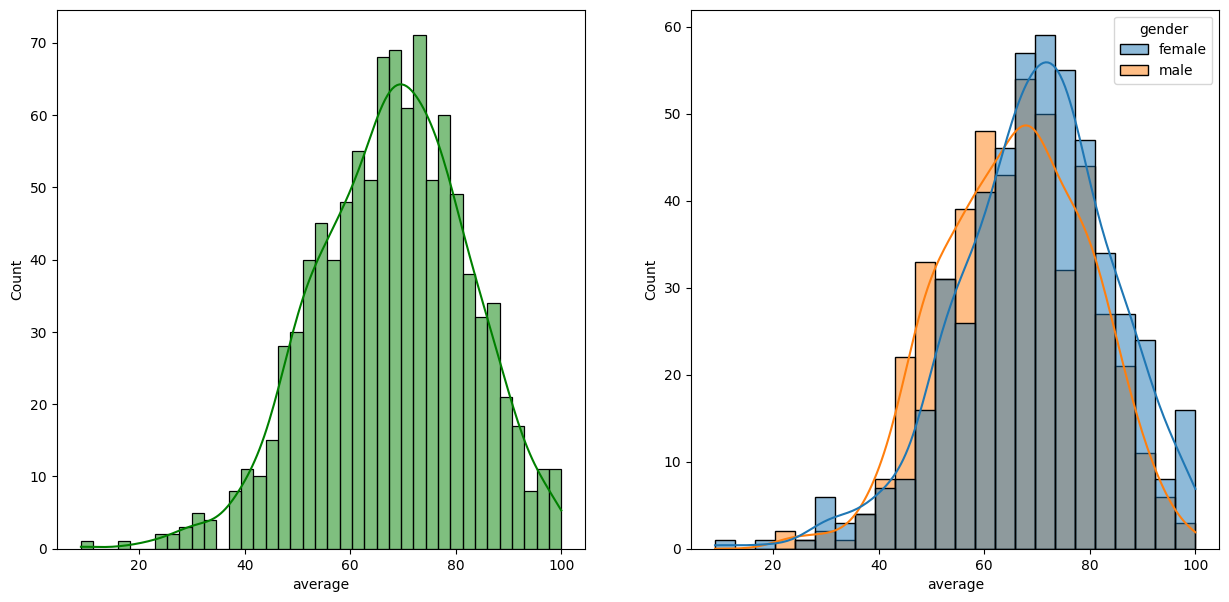

In [25]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df , x='average' , bins = 39 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = df ,x= 'average' ,kde =True , hue = 'gender' )

<Axes: xlabel='Total', ylabel='Count'>

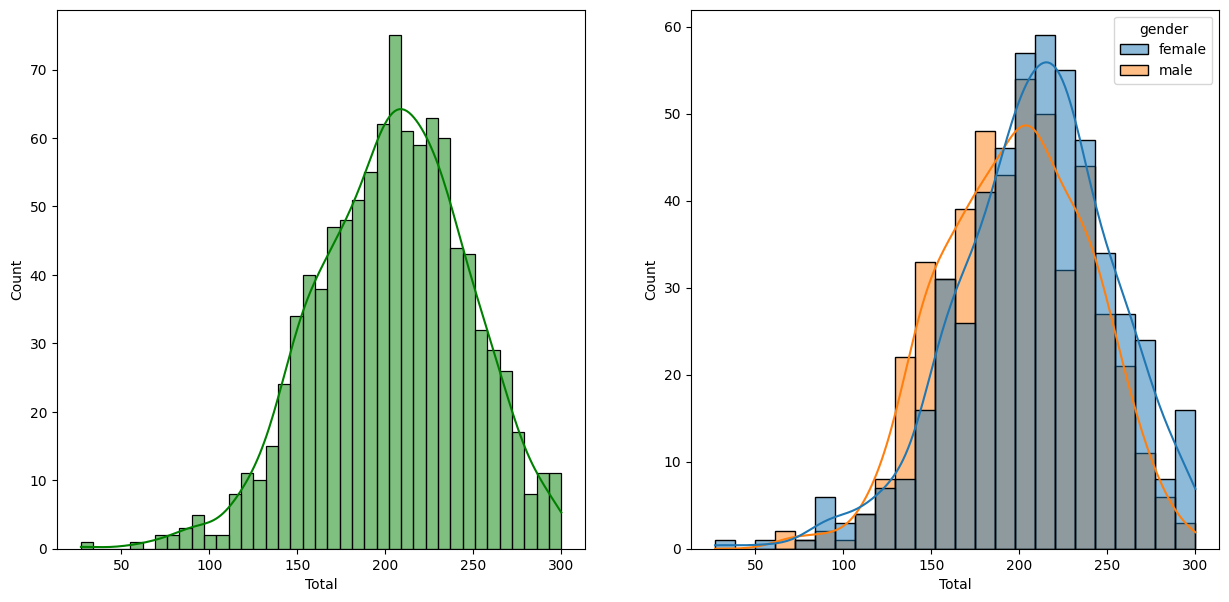

In [26]:
fig, axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df , x='Total' , bins = 39 , kde = True , color = 'g')
plt.subplot(122)
sns.histplot(data = df ,x= 'Total' ,kde =True , hue = 'gender' )

C:\Users\kah23\AppData\Local\Temp\ipykernel_14836\100664000.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\kah23\AppData\Local\Temp\ipykernel_14836\100664000.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\kah23\AppData\Local\Temp\ipykernel_14836\100664000.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


<Axes: xlabel='average', ylabel='Count'>

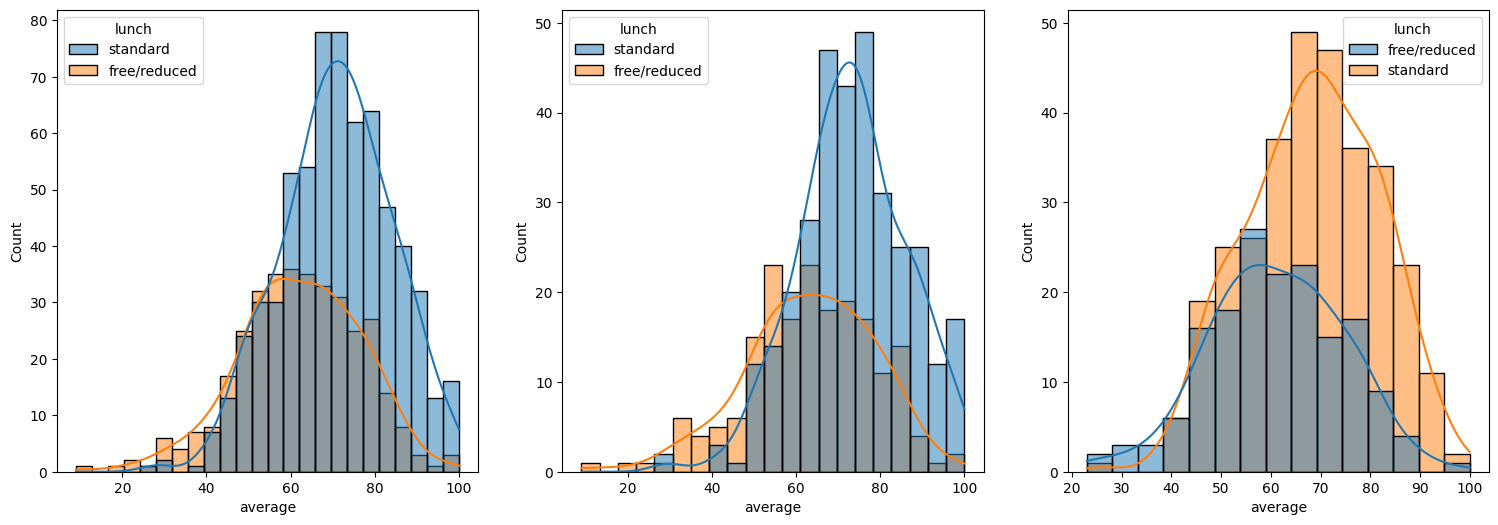

In [ ]:
fig , axis  = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

# better lunch brings better marks 

C:\Users\kah23\AppData\Local\Temp\ipykernel_14836\1044741348.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\kah23\AppData\Local\Temp\ipykernel_14836\1044741348.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\kah23\AppData\Local\Temp\ipykernel_14836\1044741348.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


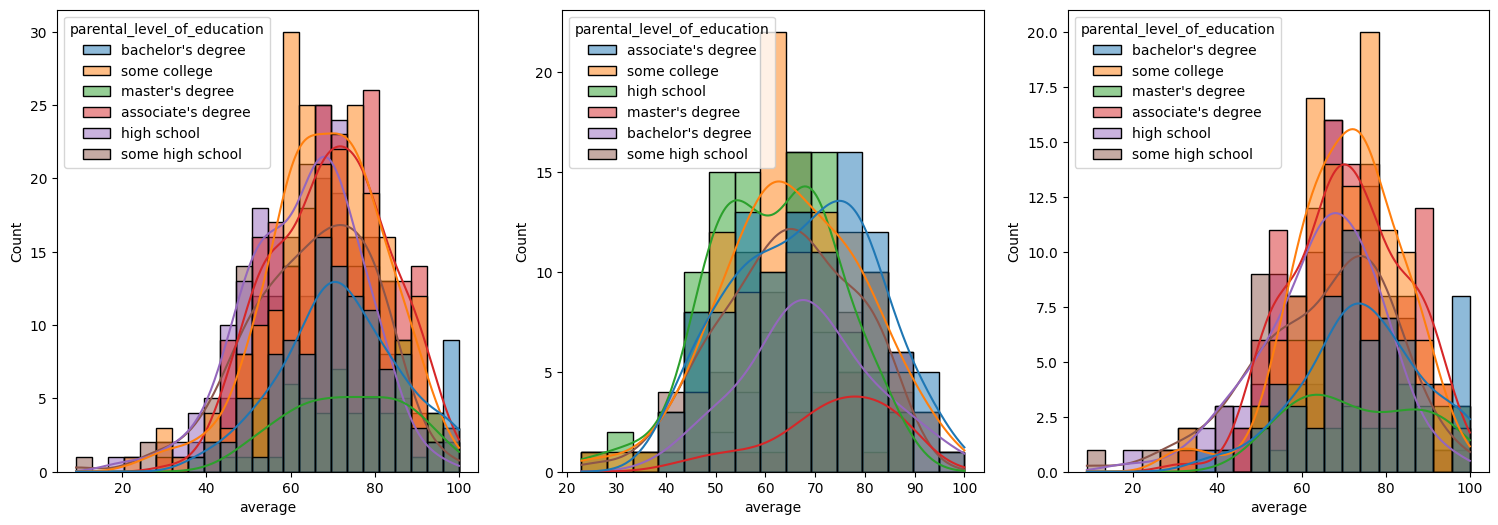

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')


# In general parent's education don't help student perform well in exam.

# 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam bcs the associate and master curve are skwed
# for Associate’s/Master’s degree parents peaks at a higher average score than other groups, it means males with more educated parents perform slightly better. 

# 3rd plot we can see there is no effect of parent's education on female students.

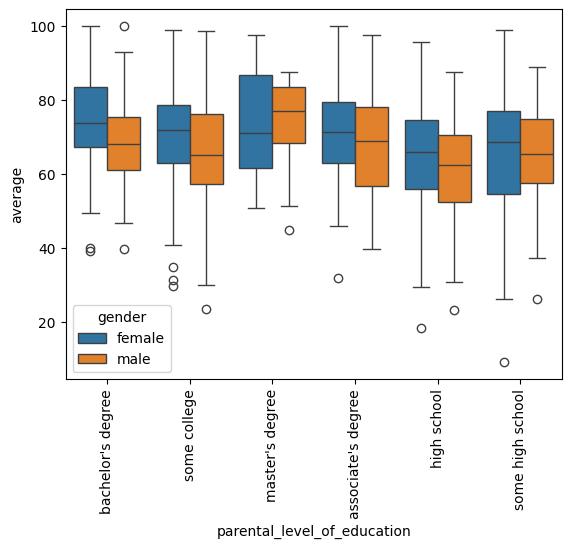

In [35]:
sns.boxplot(data=df, x='parental_level_of_education', y='average', hue='gender')
plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='average', ylabel='Count'>

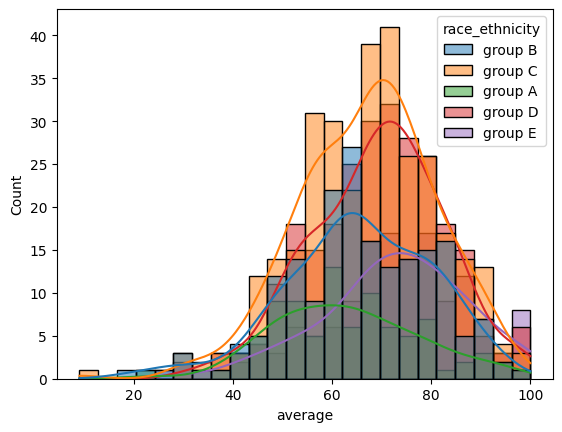

In [ ]:
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')

#Students of group A and group B tends to perform poorly in exam.

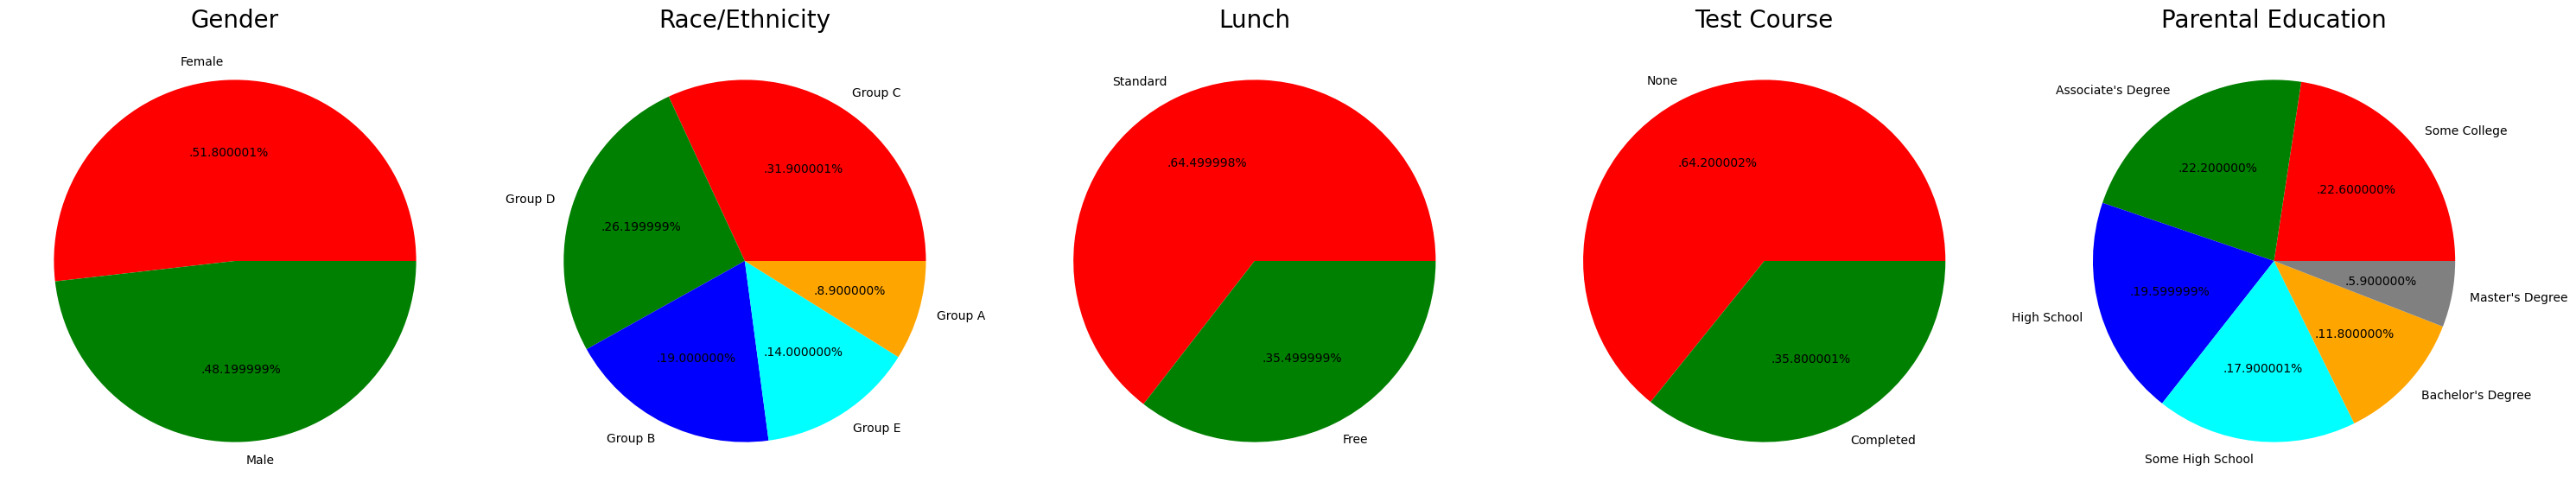

In [40]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [39]:
columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

C:\Users\kah23\AppData\Local\Temp\ipykernel_14836\3113347344.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental_level_of_education'], palette = 'Blues')


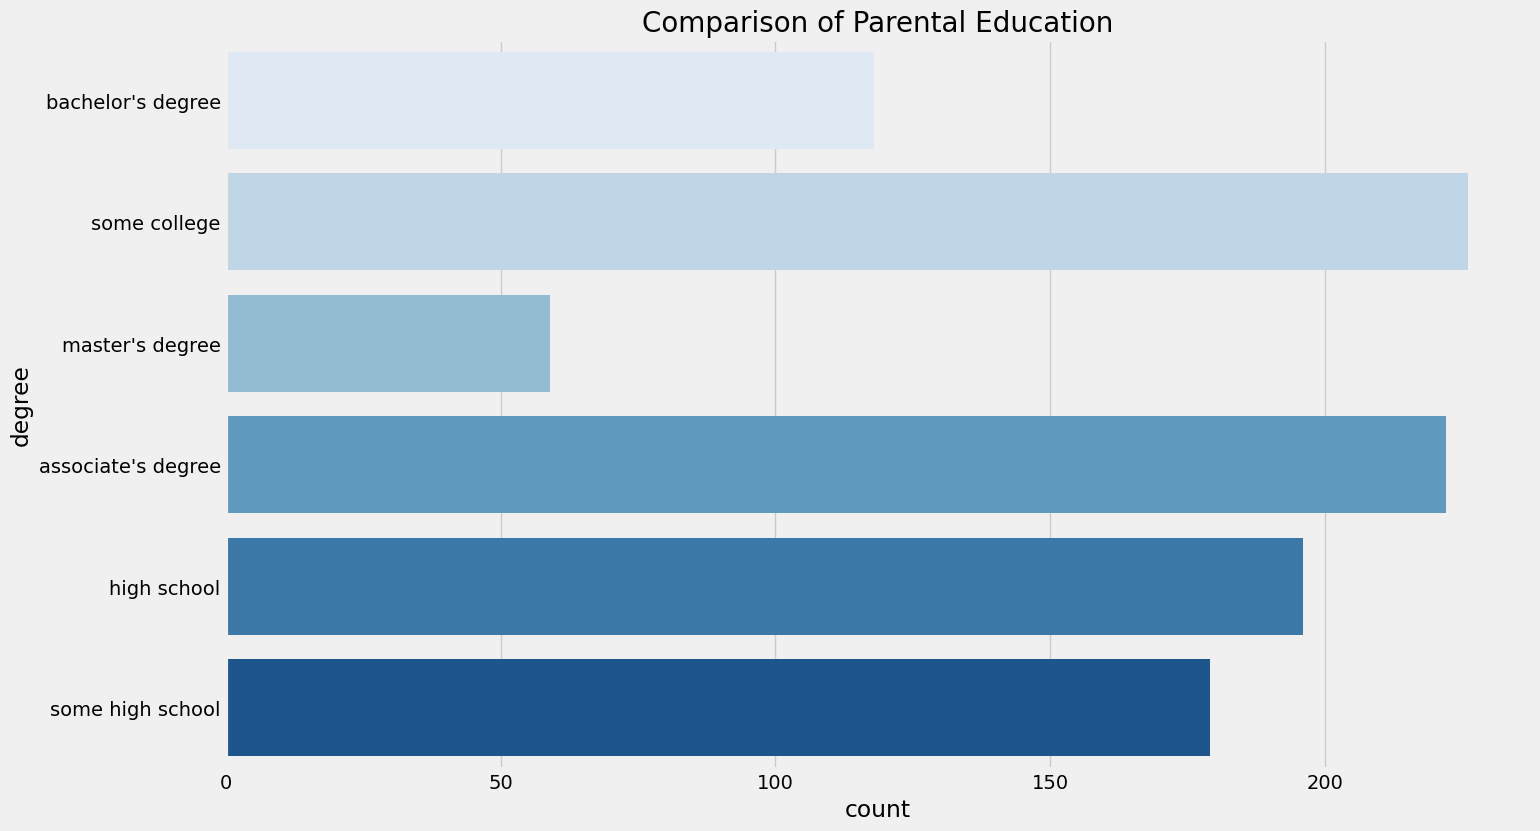

In [42]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('count')
plt.ylabel('degree')
plt.show()

C:\Users\kah23\AppData\Local\Temp\ipykernel_14836\1574873987.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette = 'PuBu')


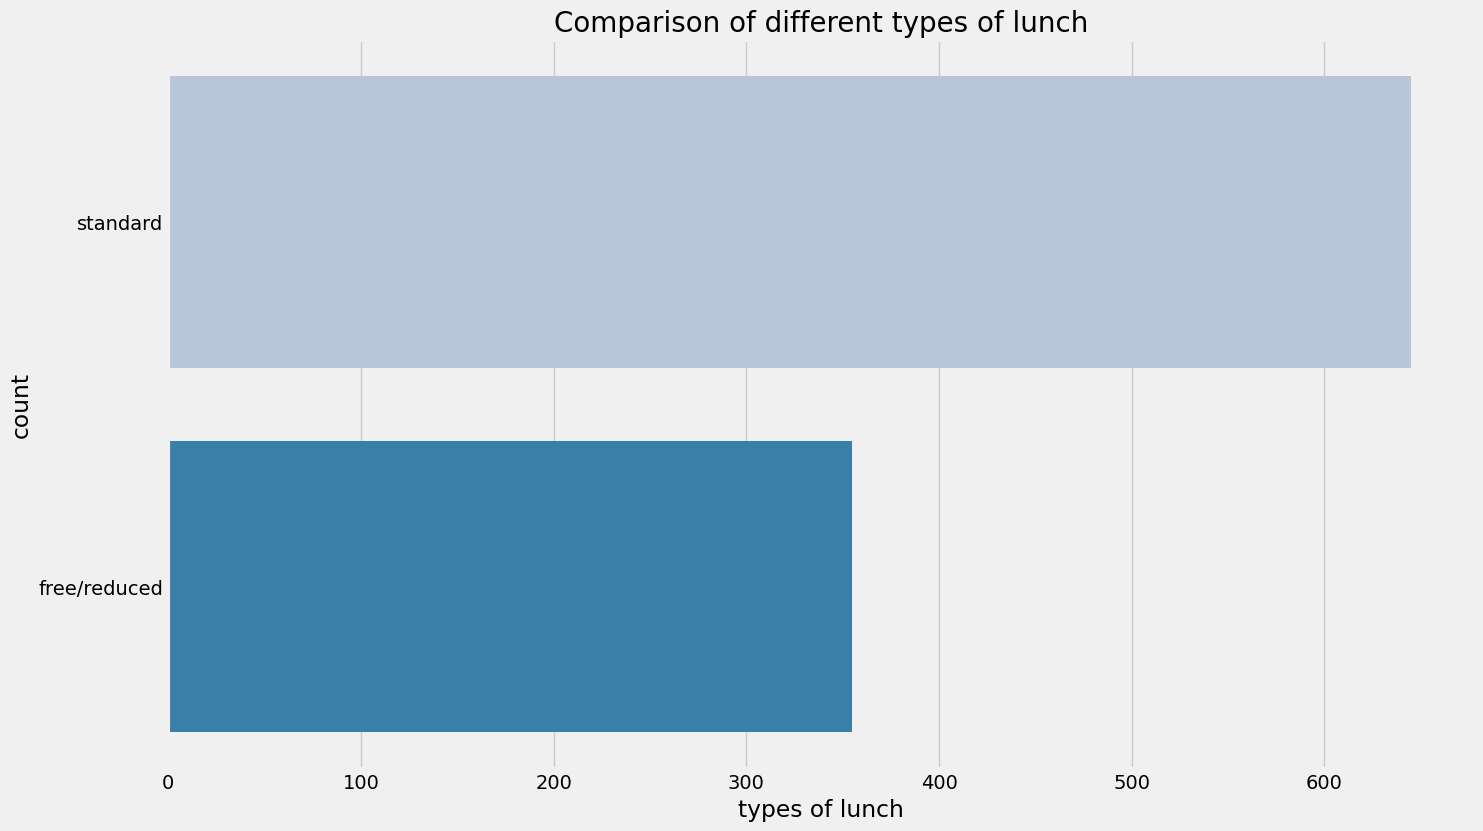

In [47]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

<Axes: xlabel='lunch', ylabel='writing_score'>

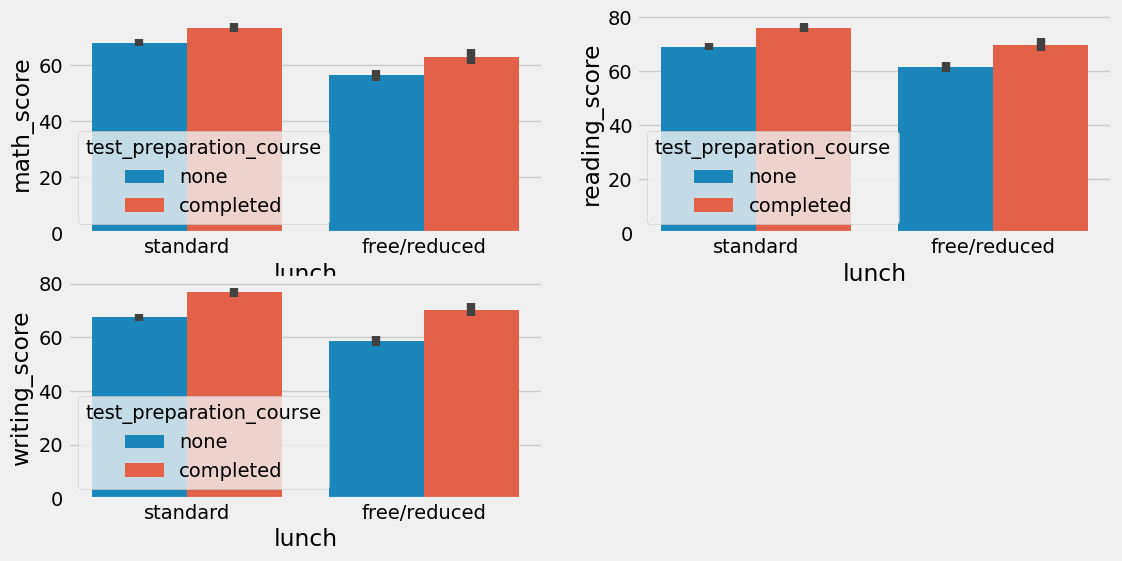

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

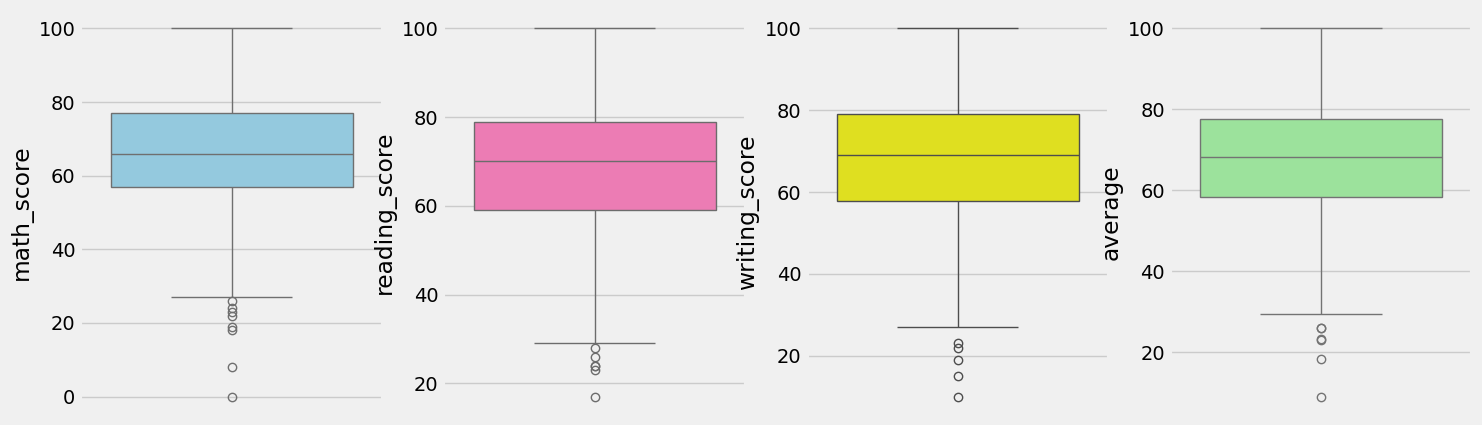

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()


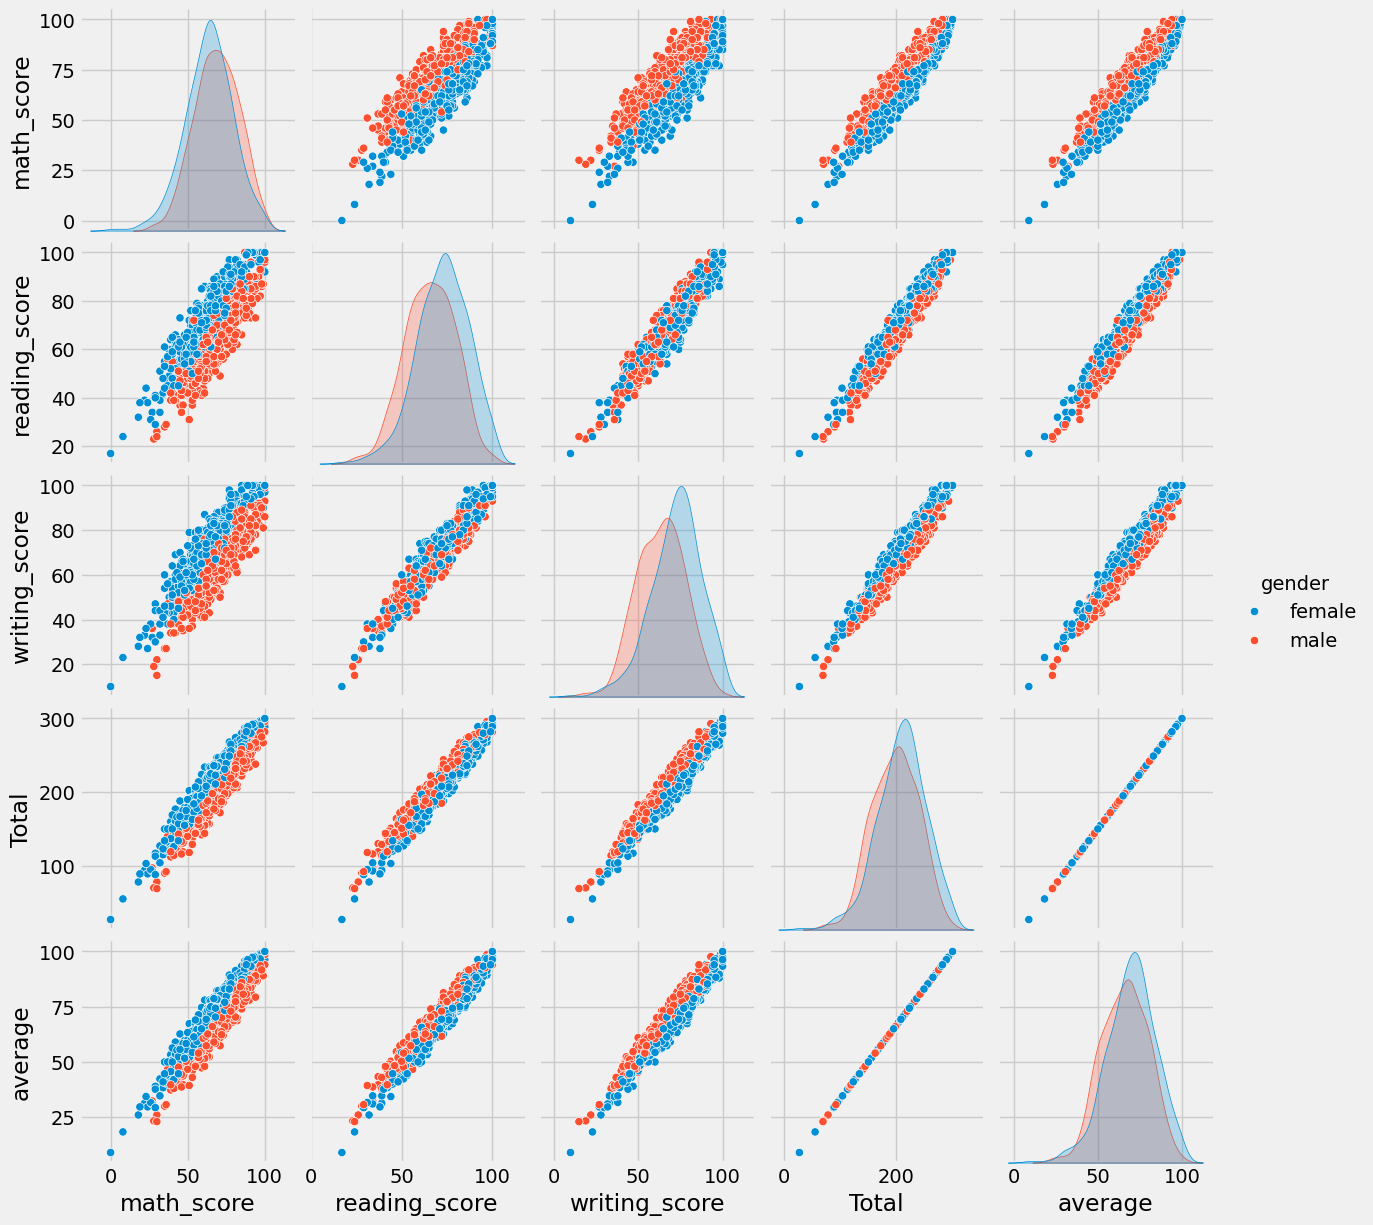

In [52]:
sns.pairplot(df,hue = 'gender')
plt.show()